![](../images/itam_logo.png)
<br> 

M.Sc. Liliana Millán Núñez liliana.millan@itam.mx

Octubre 2021

### Agenda 

+ Pandas
  + Estructuras de datos
  + Series
    + Creación
    + I/O
    + Indexado
    + Operaciones frecuentes
  + DataFrames
    + Creación
    + I/O
    + Indexado
    + Operaciones frecuentes



### Pandas 

Pandas es una librería de Python que nos permite realizar limpieza, manipulación y análisis de datos. 

Para instalar Pandas solo requieres de correr la instrucción `pip install pandas` **dentro** de tu ambiente virtual de la clase.

Como todas las librerías oficiales de Python, Pandas tiene su Documentación Técnica en su [API de referencia](https://pandas.pydata.org/docs/reference/index.html) que se encuentra en la página oficial de Pandas. Dependiendo de la versión que ocupes de Pandas podrás encontrar su respectiva documentación técnica. Nosotros ocuparemos la versión 1.3.3 que acaba de liberarse el 12 de septiembre de este año!.

En Pandas hay dos estructuras de datos básicas: los *DataFrame* y los *Series*. 

Un  *DataFrame* te permite tener los datos acomodados en formato tabular -una tabla-, conformada por renglones o filas, y por columnas. Cada renglón corresponde a una observación y cada columna corresponde a una variable que describe cierta información asociada a la observación. 

![](./images/tidy_data.png)
<br>

|Id|Nombre|Edad|
|:---:|:--------------|:----:|
|1|Maria|35|
|2|Luis|31|
|3|José|33|
|4|Martha|29|
|5|Ana|25|


Esta es la forma más "común" de acomodar los datos cuando queremos analizarlos -así los usamos en Excel-.

Puedes pensar en un DataFrame como una tabla de Excel. 

Dado que una tabla -matriz- será la base de trabajo, todo en Pandas se indica primero hablando de los renglones (índice 0) y luego de las columnas (índice 1)! en pares (renglón, columna) ... tendrá sentido más adelante...

Por otro lado están los *Series*, los *Series* son las columnas del *DataFrame*, y pueden existir independientemente de un *DataFrame*. 

Todos los elementos dentro de un *Series* **deben** ser del mismo tipo. 

### Series 


#### Creación 

Se puede crear un *series* a través de una lista de python o a través de un arreglo de numpy `pip install numpy` <- (pandas lo instaló), en ambos casos puedes (debes) agregar un nombre a esta columna (variable) a través del atributo `name`. 

In [371]:
import pandas as pd
import numpy as np

In [372]:
pd.__version__

'1.3.3'

In [373]:
ages = [35,31,33,29,25]

In [374]:
ages

[35, 31, 33, 29, 25]

In [375]:
type(ages)

list

In [376]:
age = pd.Series(ages, name="age")
age

0    35
1    31
2    33
3    29
4    25
Name: age, dtype: int64

In [377]:
type(age)

pandas.core.series.Series

In [378]:
age_np = pd.Series(np.array([35,31,33,29,25]), name = "age")
age_np

0    35
1    31
2    33
3    29
4    25
Name: age, dtype: int64

In [379]:
print(type(age), type(age_np))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


**Atributos** 

+ **Tamaño**: Para conocer el tamaño de un series (su longitud) ocupamos el atributo `size`. Nota que `size` **no** es una función!, es un atributo, y por eso no lleva paréntesis en su llamada. 

In [380]:
age.size

5

+ **Dimensiones**: Para conocer las dimensiones de un *Series* ocupamos el atributo `shape`. 

¿Qué te regresó este atributo? 

In [381]:
age.shape

(5,)

In [382]:
age.shape[0]

5

In [383]:
type(age.shape)

tuple

In [384]:
len(age.shape)

1

In [385]:
age.shape[1]

IndexError: tuple index out of range

+ **Contenido**: Para que puedas interactuar con el contenido de un *Series*, sus valores, necesitaremos ocupar su atributo `values`, esto te regresará un **arreglo de numpy** de los valores del *Series*.

In [ ]:
age.values

In [ ]:
list(age.values)

#### I/O

Es posible guardar el contenido de un *Series* en algún formato más permanente que solo el *scope* de tu programa, por lo que puedes guardar un *Series* en un archivo csv, un excel, un pickle -lo verás más adelante cuando veamos algoritmos de aprendizaje de máquina-, o un *Dataframe* entre otros formatos. 

En cualquiera de estos casos necesitamos indicar la ruta donde quieres que se guarde este *Series*, el nombre del archivo, si deseas que se guarde incluyendo el nombre de tu columna y si deseas que se guarda el nombre de cada renglón -su índice-.  

In [ ]:
#Si dejas el index en True, los índices que agregó en automático Series se guardarán como parte de tus datos.
age.to_csv('/home/silil/Documents/itam/fuentes_de_datos/itam_fuentes_datos/ages_series.csv', 
                 sep=',', header=True, index=False)


#### Indexado

Por *default*, cuando creas un objeto *Series* se genera un índice numérico que inicia en 0 y que va aumentando secuencialmente. Este índice nos permite identificar cada elemento de tu *Series* de manera única. 

Es posible  cambiar el índice, siempre y cuando lo sustituyamos por uno que cumpla que siga siendo un identificador único a cada observación sin importar si es numérico o string. 

En Pandas existen dos maneras de buscar un elemento particular en cualquiera de sus dos estructuras básicas: *DataFrame* y *Series*. Puedes regresar una observación a través del lugar numérico o bien el nombre de su índice. 

+ `iloc`: Nos permite regresar la observación que se encuentra en el índice numérico x. 

Por ejemplo, en el siguiente código el índice del Series name es numérico y va de 0 a 3, al solicitar la observación con el índice 2 utilizando iloc, nos regresa la observación con el valor Juan, correspondiente a ese índice. 


In [ ]:
name = pd.Series(['Laura','Roberto','Juan','Maria', "Jorge"], name='name')
name

In [ ]:
name.iloc[2]

In [ ]:
name[2]

In [ ]:
name.loc[2]

+ `loc`: Nos permite regresar la observación que se encuentra en el índice con nombre y.

In [ ]:
id = pd.Series([1,2,3,4,5], name='id', index=name)
id

In [ ]:
id.loc['Maria']

In [ ]:
(name, age)

In [ ]:
test = pd.Series(name.values, name='edad_nombre', index=age.values)
test

In [ ]:
test.index

In [386]:
test_2 = pd.Series(name.values, name="edad_nombre", index=[1,1,9,0,0])
test_2

NameError: name 'name' is not defined

In [ ]:
test_2.iloc[1]


#### Operaciones frecuentes 

##### Estadísticas 

Dependiendo del tipo de datos que contenga el *Series* serán las diferentes estadísticas que puedes obtener de ellos. Si el *Series* es numérico, puedes obtener varias estadísticas del mismo como el valor mínimo, máximo, promedio, mediana, número de valores únicos, entre otras operaciones. 

Si el *Series* es categórico, puedes obtener la moda, el número de valores únicos entre otras operaciones. 


In [ ]:
name

In [ ]:
type(name)

In [ ]:
#cuando hay empate, las regresará ordenadas alfabéticamente. En este caso todos son moda 1.
name.mode()

In [ ]:
age

In [ ]:
age.min()

In [387]:
age.max()

35

In [388]:
age.mean()

30.6

In [389]:
print(" edad mínima: {} \n edad máxima: {}\n \
edad promedio: {}\n mediana de la edad {}".\
      format(age.min(),age.max(),age.mean(),age.median()))

 edad mínima: 25 
 edad máxima: 35
 edad promedio: 30.6
 mediana de la edad 31.0


In [390]:
q = "algo por aqui {}".format(3)
q

'algo por aqui 3'

##### Filtrado y selección de datos

+ `head` y `tail`: Nos permiten ver los primero $n$ elementos de un Series y los últimos $n$. Por default $n=5$

In [391]:
age.head(3)

0    35
1    31
2    33
Name: age, dtype: int64

In [392]:
age.head()

0    35
1    31
2    33
3    29
4    25
Name: age, dtype: int64

In [393]:
age.tail(3)

2    33
3    29
4    25
Name: age, dtype: int64

+ Puedes seleccionar solo valores que cumplen con cierta condición a través del método `get()`.

In [394]:
name

NameError: name 'name' is not defined

In [ ]:
# NOTA: Acceso a métodos de un string normal de python! 
name.get(name.str.contains('a'))

In [ ]:
# inicia con j
name.get(name.str.startswith("J"))

In [ ]:
name.str.contains("a")

In [ ]:
name[name.str.startswith("J") & (name.str.contains("a") | name.str.contains("o"))]

In [ ]:
name.get(name.str.startswith("J") & name.str.contains("a"))

In [ ]:
type(name.get(name.str.contains('a')))

In [ ]:
u = name.get(name.str.contains('a'))
type(u)

In [ ]:
u

In [ ]:
# series de un solo dato
ex = pd.Series([1], name='ex')
ex

In [ ]:
type(ex)

¿De qué tipo es lo que te regresó el código anterior? 

+ **Filter**: Este método te permite regresar elementos cuyo **índice** cumple con cierta condición.

In [ ]:
type(id)

In [ ]:
id

In [395]:
id.values

AttributeError: 'builtin_function_or_method' object has no attribute 'values'

In [ ]:
id.index

In [ ]:
id.filter(like='M')

In [ ]:
id.filter(like='J')

##### Manipulación de datos

+ `mask`: Esta función nos permite modificar los valores de las observaciones que cumplen con alguna condición. El cambio se puede dejar registrado en el mismo *Series* ocupando la opción `inplace=True`, o se puede guardar en un *Series* nuevo.
+ `where`: Esta función nos permite modificar los valores de las observaciones que **no** cumplen con alguna condición. El cambio se puede dejar registrado en el mismo *Series* ocupando la opción `inplace=True`, o se puede guardar en un *Series* nuevo.

`mask`:

In [ ]:
age

In [ ]:
age_modified = age.mask(age < 30, other=30)
age_modified

In [ ]:
age

In [ ]:
age.mask(age < 30, other=30, inplace=True)
age

In [396]:
name

NameError: name 'name' is not defined

In [ ]:
name.mask(name != 'Maria', other="Maria", inplace=True)

In [ ]:
name

`where`

In [ ]:
age

In [ ]:
age_modified = age.where(age < 31, other=35)
age_modified

In [ ]:
age

In [ ]:
age_modified

In [397]:
# conversion a lista original de python
age_l = age.to_list()

In [398]:
list(age)

[35, 31, 33, 29, 25]

In [399]:
age_l

[35, 31, 33, 29, 25]

+ `fillna`: Podemos rellenar los valores faltantes de un *Series* ocupando un procedimiento particular, o bien estableciendo el valor por *default* a ocupar -como -1,0 <- ¡cuidado con esto!- cuando se encuentre un na, o bien qué poner de acuerdo al índice. 

+ `dropna`: Podemos eliminar observaciones que tengan na $\leftarrow$ más que eliminarlos, en análisis de datos nos gusta ponerlos en otro lugar para saber cuáles borramos y luego preguntar por qué están en na, tal vez haya un error en el proceso que llena estos datos. 

+ `drop_duplicates`: Esta función nos permite eliminar los duplicados existentes en un *Series*, muy útil para el análisis de datos. 

### DataFrames

#### Creación 

Existen diversas maneras de crear un *DataFrame*, las más comunes son a través de un diccionario, o  a través de leer un conjunto de datos externos a Pandas como Excel, CSV -archivos separados por coma (comma separated values)-.

Si utilizamos un diccionario para crear el *DataFrame*, cada llave se convertirá en una columna -con ese nombre- y el valor asociado a la llave, los valores de esa columna. 

In [400]:
# creación con listas
census_df = pd.DataFrame(data=[[1,'Laura',45,'F'], 
                               [2,'Roberto',37,'M'], 
                               [3,'Juan',25,'M'],
                               [4,'Maria',33,'F']],
                        columns=['id', 'name', 'age', 'sex'])
census_df

,id,name,age,sex
0,1,Laura,45,F
1,2,Roberto,37,M
2,3,Juan,25,M
3,4,Maria,33,F


In [401]:
# creación con diccionario
census_df = pd.DataFrame({'id': [1, 2, 3, 4], 
                         'name': ['Laura', "Roberto", "Juan", "Maria"],
                         'age': [45, 37, 25, 33],
                         'sex': ['F', 'M', 'M', "F"]})

In [402]:
census_df

,id,name,age,sex
0,1,Laura,45,F
1,2,Roberto,37,M
2,3,Juan,25,M
3,4,Maria,33,F


In [403]:
type(census_df)

pandas.core.frame.DataFrame

In [404]:
type(census_df.age)

pandas.core.series.Series

In [405]:
census_df.age

0    45
1    37
2    25
3    33
Name: age, dtype: int64

In [406]:
type(census_df.age.values)

numpy.ndarray

In [407]:
census_df.age.values

array([45, 37, 25, 33])

In [408]:
census_df.age.min()

25

Al igual que con los *Series*, los *DataFrames* también tiene un índice que inicia en 0 y va aumentando secuencialmente, el índice funciona como nombre de la observación (*label*). 


##### Atributos

Los atributos más utilizados de un *DataFrame* consisten en:

+ Conocer su tamaño: `size`
+ Conocer su forma: `shape`
+ Conocer las columnas que lo conforman: `columns`
+ Conocer los tipos de datos de cada columna: `dtypes`


#### Input/Output

La otra forma de crear un *DataFrame* tiene que ver con ingestar datos desde fuentes externas a Pandas, donde las más comunes son leer datos desde Excel y leer datos desde archivos separados por coma (CSV). 

Para leer datos desde Excel necesitaremos ocupar el método `read_excel` de pandas, indicando la ruta donde se encuentra el archivo que quieremos leer y la hoja en particular a leer.  La ruta puede ser un URL, un FTP e incluso un *bucket* de almacenamiento distribuido como S3. Para poder ocupar este método tendremos que instalar la librería `xlrd` que Pandas ocupa como auxiliar con el siguiente comando `pip install xlrd` y la librería `openpyxl` con el comando `pip install openpyxl`.


In [409]:
census_df.size 

16

In [410]:
census_df.shape

(4, 4)

In [411]:
census_df.columns

Index(['id', 'name', 'age', 'sex'], dtype='object')

In [412]:
census_df.columns.values

array(['id', 'name', 'age', 'sex'], dtype=object)

In [413]:
census_df.dtypes

id       int64
name    object
age      int64
sex     object
dtype: object

In [414]:
grades = pd.read_excel("/home/silil/Documents/ejemplo.xlsx", 
                       sheet_name="Calificaciones")
grades

,Alumno,Nombre,Tarea 1
0,1,Juan Perez,10
1,2,María López,5
2,3,Marco Rodríguez,7
3,4,Luis Ramírez,7
4,5,Sofía Martínez,6


Para leer datos desde un archivo separado por comas necesitaremos ocupar el método `read_csv` de pandas, indicando la ruta donde se encuentra el archivo que quieres leer, el separador que quieres ocupar que por *default* es una coma `,` -aunque tu lo puedes cambiar a cualquier otro caracter-, puedes indicar si el primer renglón será tomado con el nombre de las columnas. 

In [415]:
pollution = pd.read_csv("/home/silil/Documents/itam/mineria_datos_licenciatura/data/beijing_pollution/pollution.csv")
pollution.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [416]:
pollution.shape

(43824, 13)

In [417]:
pollution.year.unique()

array([2010, 2011, 2012, 2013, 2014])

In [418]:
pollution.month.nunique()

12

In [419]:
pollution['month'].nunique()

12

In [420]:
# contar cuantos missings hay en pm2.5
pollution['pm2.5'].isna().sum()

2067

In [421]:
pollution['pm2.5'].isna().head()

0    True
1    True
2    True
3    True
4    True
Name: pm2.5, dtype: bool

In [422]:
pollution.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [423]:
pollution.year.value_counts()

2012    8784
2010    8760
2011    8760
2013    8760
2014    8760
Name: year, dtype: int64

In [424]:
pollution.year.value_counts(normalize=True)

2012    0.200438
2010    0.199890
2011    0.199890
2013    0.199890
2014    0.199890
Name: year, dtype: float64

$\rightarrow$ Nota que Pandas identifica cuando una columna tiene valores faltantes y los identifica como `NaN` (Not a Number).

#### Indexado 

Al igual que con el indexado de *Series* puedes seleccionar observaciones a través de los métodos `iloc` y `loc`. 

Sin embargo, debido a que los *DataFrames* tienen más de una columna, es posible hacer otro tipos de indexados. Por ejemplo, es posible agregar columnas al *DataFrame* en un índice en particular, para ello podemos ocupar el método `insert`, donde tendremos que indicar el índice en donde agregaremos la columna, el nombre que tendrá y qué valores. 


In [425]:
grades

,Alumno,Nombre,Tarea 1
0,1,Juan Perez,10
1,2,María López,5
2,3,Marco Rodríguez,7
3,4,Luis Ramírez,7
4,5,Sofía Martínez,6


In [426]:
ages = [19,20,19,18,19]
grades.insert(loc=2, column="Edad", value=ages)
grades

,Alumno,Nombre,Edad,Tarea 1
0,1,Juan Perez,19,10
1,2,María López,20,5
2,3,Marco Rodríguez,19,7
3,4,Luis Ramírez,18,7
4,5,Sofía Martínez,19,6


In [427]:
ages_2 = [10, 13,'','','']
grades.insert(loc=3, column="edad_3", value=ages_2)

In [428]:
grades.edad_3.isna()

0    False
1    False
2    False
3    False
4    False
Name: edad_3, dtype: bool

In [429]:
grades.dtypes

Alumno      int64
Nombre     object
Edad        int64
edad_3     object
Tarea 1     int64
dtype: object

In [430]:
grades

,Alumno,Nombre,Edad,edad_3,Tarea 1
0,1,Juan Perez,19,10,10
1,2,María López,20,13,5
2,3,Marco Rodríguez,19,,7
3,4,Luis Ramírez,18,,7
4,5,Sofía Martínez,19,,6


In [431]:
# borrar columnas en el mismo dataframe
grades.drop(['edad_3'], axis=1, inplace=True)

In [432]:
# borrar renglones en el mismo dataframe
#grades.drop([4], inplace=True)

In [433]:
grades

,Alumno,Nombre,Edad,Tarea 1
0,1,Juan Perez,19,10
1,2,María López,20,5
2,3,Marco Rodríguez,19,7
3,4,Luis Ramírez,18,7
4,5,Sofía Martínez,19,6


In [434]:
grades['Estatura'] = [1.75, 1.65, 1.70, 1.67, 1.70]

In [435]:
grades

,Alumno,Nombre,Edad,Tarea 1,Estatura
0,1,Juan Perez,19,10,1.75
1,2,María López,20,5,1.65
2,3,Marco Rodríguez,19,7,1.70
3,4,Luis Ramírez,18,7,1.67
4,5,Sofía Martínez,19,6,1.70


También es posible acceder a una celda en particular utilizando los métodos `at` y `iat`, `at` nos permite utilizar las etiquetas de los renglones y las columnas, mientras que `iat` requiere que solo ocupemos posiciones enteras. 

In [436]:
grades.at[4, 'Nombre']

'Sofía Martínez'

In [437]:
grades.iat[4, 1]

'Sofía Martínez'

#### Operaciones frecuentes

##### Estadísticas

Podemos obtener una descripción estadística básica de un *DataFrame* para las variables numéricas utilizando el método `describe` que nos regresará el número de observaciones que tenemos en el *DataFrame*, el valor mínimo y máximo para cada variable, el promedio, la mediana, el cuartil 25% y el cuartil 75% así como la desviación estándar. 

In [438]:
grades.describe()

,Alumno,Edad,Tarea 1,Estatura
count,5.000000,5.000000,5.000000,5.000000
mean,3.000000,19.000000,7.000000,1.694000
std,1.581139,0.707107,1.870829,0.037815
min,1.000000,18.000000,5.000000,1.650000
25%,2.000000,19.000000,6.000000,1.670000
50%,3.000000,19.000000,7.000000,1.700000
75%,4.000000,19.000000,7.000000,1.700000
max,5.000000,20.000000,10.000000,1.750000


In [439]:
grades.dtypes

Alumno        int64
Nombre       object
Edad          int64
Tarea 1       int64
Estatura    float64
dtype: object

In [440]:
pollution.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


También podemos obtener otras métricas estadísticas como la correlación `corr`, la covarianza `cov`,  un ranqueo `rank`, porcentajes de cambio entre observaciones `pct_change`, etc.

In [441]:
grades.corr()

,Alumno,Edad,Tarea 1,Estatura
Alumno,1.000000,-0.447214,-0.507093,-0.334497
Edad,-0.447214,1.000000,-0.377964,-0.186989
Tarea 1,-0.507093,-0.377964,1.000000,0.883442
Estatura,-0.334497,-0.186989,0.883442,1.000000


In [442]:
grades.cov()

,Alumno,Edad,Tarea 1,Estatura
Alumno,2.50,-0.500,-1.5000,-0.02000
Edad,-0.50,0.500,-0.5000,-0.00500
Tarea 1,-1.50,-0.500,3.5000,0.06250
Estatura,-0.02,-0.005,0.0625,0.00143


In [443]:
grades

,Alumno,Nombre,Edad,Tarea 1,Estatura
0,1,Juan Perez,19,10,1.75
1,2,María López,20,5,1.65
2,3,Marco Rodríguez,19,7,1.70
3,4,Luis Ramírez,18,7,1.67
4,5,Sofía Martínez,19,6,1.70


In [444]:
grades['Tarea 1'].rank(method='dense', ascending=True)

0    4.0
1    1.0
2    3.0
3    3.0
4    2.0
Name: Tarea 1, dtype: float64

In [445]:
grades['Tarea 1'].rank(method="dense", ascending=False)

0    1.0
1    4.0
2    2.0
3    2.0
4    3.0
Name: Tarea 1, dtype: float64

In [446]:
grades['rank'] = grades['Tarea 1'].rank(method="dense", ascending=False)

In [447]:
grades

,Alumno,Nombre,Edad,Tarea 1,Estatura,rank
0,1,Juan Perez,19,10,1.75,1.0
1,2,María López,20,5,1.65,4.0
2,3,Marco Rodríguez,19,7,1.70,2.0
3,4,Luis Ramírez,18,7,1.67,2.0
4,5,Sofía Martínez,19,6,1.70,3.0


In [448]:
grades.sort_values(by='rank', ascending=True)

,Alumno,Nombre,Edad,Tarea 1,Estatura,rank
0,1,Juan Perez,19,10,1.75,1.0
2,3,Marco Rodríguez,19,7,1.70,2.0
3,4,Luis Ramírez,18,7,1.67,2.0
4,5,Sofía Martínez,19,6,1.70,3.0
1,2,María López,20,5,1.65,4.0


In [449]:
grades.sort_values(by='Estatura', ascending=False)

,Alumno,Nombre,Edad,Tarea 1,Estatura,rank
0,1,Juan Perez,19,10,1.75,1.0
2,3,Marco Rodríguez,19,7,1.70,2.0
4,5,Sofía Martínez,19,6,1.70,3.0
3,4,Luis Ramírez,18,7,1.67,2.0
1,2,María López,20,5,1.65,4.0


In [450]:
grades['Tarea 1'].sort_values()

1     5
4     6
2     7
3     7
0    10
Name: Tarea 1, dtype: int64

In [451]:
grades['Tarea 1'].sort_values().pct_change()

1         NaN
4    0.200000
2    0.166667
3    0.000000
0    0.428571
Name: Tarea 1, dtype: float64

##### Filtrado y selección de datos

Podemos ver las primeras $n$ observaciones de un *DataFrame* ocupando el método `head`, si no le indicamos cuántos, por *default* nos regresará los primeros 5. 

In [452]:
pollution.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [453]:
pollution.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [454]:
pollution.year.unique()

array([2010, 2011, 2012, 2013, 2014])

In [455]:
pollution.No.nunique()

43824

In [456]:
pollution.shape

(43824, 13)

In [457]:
pollution.nunique()

No       43824
year         5
month       12
day         31
hour        24
pm2.5      581
DEWP        69
TEMP        64
PRES        60
cbwd         4
Iws       2788
Is          28
Ir          37
dtype: int64

In [458]:
pollution.shape

(43824, 13)

##### Manipulación de datos

+ `drop_duplicates`: Nos permite eliminar observaciones repetidas del *DataFrame*, para que sean consideradas como repetidas tienen que tener los mismos valores en **todas** las variables del *DataFrame* 

In [459]:
grades

,Alumno,Nombre,Edad,Tarea 1,Estatura,rank
0,1,Juan Perez,19,10,1.75,1.0
1,2,María López,20,5,1.65,4.0
2,3,Marco Rodríguez,19,7,1.70,2.0
3,4,Luis Ramírez,18,7,1.67,2.0
4,5,Sofía Martínez,19,6,1.70,3.0


In [460]:
grades.drop(['Estatura', 'rank'], axis=1, inplace=True)

In [461]:
grades_2 = pd.DataFrame([[1, 'Juan Perez', 19, 10],[4, 'Luis Ramírez', 18, 7]],
                       columns=['Alumno', 'Nombre', 'Edad', 'Tarea 1'], index=[5,6])
grades_2

,Alumno,Nombre,Edad,Tarea 1
5,1,Juan Perez,19,10
6,4,Luis Ramírez,18,7


In [462]:
## append!
other_grades = grades.append(grades_2)
other_grades

,Alumno,Nombre,Edad,Tarea 1
0,1,Juan Perez,19,10
1,2,María López,20,5
2,3,Marco Rodríguez,19,7
3,4,Luis Ramírez,18,7
4,5,Sofía Martínez,19,6
5,1,Juan Perez,19,10
6,4,Luis Ramírez,18,7


In [463]:
other_grades.shape

(7, 4)

In [464]:
other_grades.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
6     True
dtype: bool

In [465]:
other_grades.duplicated().sum()

2

In [466]:
other_grades.drop_duplicates(inplace=True)

In [467]:
other_grades.duplicated().sum()

0

In [468]:
other_grades

,Alumno,Nombre,Edad,Tarea 1
0,1,Juan Perez,19,10
1,2,María López,20,5
2,3,Marco Rodríguez,19,7
3,4,Luis Ramírez,18,7
4,5,Sofía Martínez,19,6


In [469]:
# Filtrado y seleccion
pollution_2010 = pollution[pollution.year == 2010]

In [470]:
pollution_2010.shape

(8760, 13)

In [471]:
pollution_2010.year.unique()

array([2010])

In [472]:
pollution_2010_b = pollution[(pollution.year == 2010) & (pollution['pm2.5'] <= 29)]
pollution_2010_b.shape

(1752, 13)

In [473]:
pollution_2010_b.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,1752.000000,1752.0,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000
mean,4441.279110,2010.0,6.602740,15.792808,11.566781,17.685502,-9.979452,6.152968,1022.383562,72.216301,0.020548,0.399543
std,2996.396632,0.0,4.089344,8.894129,6.375737,6.295127,12.500674,12.094550,10.293683,88.744413,0.420261,2.930795
min,75.000000,2010.0,1.000000,1.000000,0.000000,1.000000,-28.000000,-19.000000,996.000000,0.450000,0.000000,0.000000
25%,1607.750000,2010.0,3.000000,8.000000,6.000000,13.000000,-21.000000,-3.000000,1015.000000,7.150000,0.000000,0.000000
50%,3959.500000,2010.0,6.000000,14.000000,12.000000,17.000000,-13.000000,5.000000,1024.000000,35.320000,0.000000,0.000000
75%,7491.250000,2010.0,11.000000,24.000000,17.000000,23.000000,-1.000000,14.000000,1031.000000,110.850000,0.000000,0.000000
max,8760.000000,2010.0,12.000000,31.000000,23.000000,29.000000,24.000000,41.000000,1043.000000,565.490000,11.000000,36.000000


+ `rename`: Nos permite cambiar el nombre de las columnas de un DataFrame, lo ocuparemos bastante en el curso. 

Parte de la limpieza inicial de cualquier *set* de datos requiere de limpiar los nombres de las columnas, para ello pasamos todo a minúsculas y cambiamos los espacions por guiónes bajos para cumplir con la guía de estilo. 

En este momento realizaremos el cambio de forma "manual" cuando lo veamos en EDA lo haremos de forma programática.

In [474]:
grades.columns.values

array(['Alumno', 'Nombre', 'Edad', 'Tarea 1'], dtype=object)

In [475]:
grades.rename(columns={'Edad': 'edad', 
                       'Nombre': 'nombre',
                       'Tarea 1': 'tarea_1'},
             inplace=True)
grades

,Alumno,nombre,edad,tarea_1
0,1,Juan Perez,19,10
1,2,María López,20,5
2,3,Marco Rodríguez,19,7
3,4,Luis Ramírez,18,7
4,5,Sofía Martínez,19,6


In [476]:
def rename_columns(column):
    new_name = column.lower().\
    replace(" ","_").\
    replace("/","_").\
    replace("á","a").\
    replace("é","e").\
    replace("í","i").\
    replace("ó","o").\
    replace("ú","u").\
    replace(".","_")
    
    return new_name

In [477]:
grades.rename(columns={element: rename_columns(element) for element in grades.columns.values}, 
             inplace=True)

grades.head()

,alumno,nombre,edad,tarea_1
0,1,Juan Perez,19,10
1,2,María López,20,5
2,3,Marco Rodríguez,19,7
3,4,Luis Ramírez,18,7
4,5,Sofía Martínez,19,6


In [478]:
grades[(grades.tarea_1 > 5) & (grades.alumno < 4)]

,alumno,nombre,edad,tarea_1
0,1,Juan Perez,19,10
2,3,Marco Rodríguez,19,7


+ `groupby`/`aggregate`: Nos permite realizar grupos de los datos a través de diferentes condiciones en las variables del *DataFrame*, normalmente a cada grupo le aplicamos alguna operación a la que llamamos agregación. 

Cuando ocupamos un `groupby`, la salida será un *DataFrame* más pequeño, pues el número de observaciones dependerá del número de grupos y el número de variables del número de agregaciones realizadas a cada grupo. 

In [479]:
pollution.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [480]:
pollution.rename(columns={element: rename_columns(element) for element in pollution.columns.values}, 
                inplace=True)
pollution.head()

,no,year,month,day,hour,pm2_5,dewp,temp,pres,cbwd,iws,is,ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [481]:
pollution.year.unique()

array([2010, 2011, 2012, 2013, 2014])

In [482]:
pm_2_5_per_group = pollution.groupby(['year'])['pm2_5', 'iws']\
.agg(['mean', 'std'])\
.reset_index()

pm_2_5_per_group

/home/silil/.pyenv/versions/fuentes_datos/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



year       pm2_5                   iws           
               mean        std       mean        std
0  2010  104.045730  92.281185  28.393053  55.016186
1  2011   99.071340  92.967298  26.232765  52.961233
2  2012   90.545871  81.745087  24.143322  49.116161
3  2013  101.712376  98.070477  21.057219  47.486790
4  2014   97.734557  93.531528  19.618643  44.221399

In [483]:
pollution.groupby(['year'], as_index=False)['pm2_5', 'iws'].mean()

/home/silil/.pyenv/versions/fuentes_datos/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,year,pm2_5,iws
0,2010,104.045730,28.393053
1,2011,99.071340,26.232765
2,2012,90.545871,24.143322
3,2013,101.712376,21.057219
4,2014,97.734557,19.618643


In [484]:
pm_2_5_per_group.columns

MultiIndex([( 'year',     ''),
            ('pm2_5', 'mean'),
            ('pm2_5',  'std'),
            (  'iws', 'mean'),
            (  'iws',  'std')],
           )

In [485]:
pm_2_5_per_group[pm_2_5_per_group.year == 2010]

year      pm2_5                   iws           
              mean        std       mean        std
0  2010  104.04573  92.281185  28.393053  55.016186

In [486]:
pm_2_5_per_group = pollution.groupby(['year'])['pm2_5', 'iws']\
.agg(['mean', 'std'])\
.reset_index()

pm_2_5_per_group

/home/silil/.pyenv/versions/fuentes_datos/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



year       pm2_5                   iws           
               mean        std       mean        std
0  2010  104.045730  92.281185  28.393053  55.016186
1  2011   99.071340  92.967298  26.232765  52.961233
2  2012   90.545871  81.745087  24.143322  49.116161
3  2013  101.712376  98.070477  21.057219  47.486790
4  2014   97.734557  93.531528  19.618643  44.221399

In [487]:
pm_2_5_per_group.index

RangeIndex(start=0, stop=5, step=1)

In [488]:
pm_2_5_per_group.shape

(5, 5)

In [489]:
pollution.groupby(['year'], as_index=False)\
.count()

,year,no,month,day,hour,pm2_5,dewp,temp,pres,cbwd,iws,is,ir
0,2010,8760,8760,8760,8760,8091,8760,8760,8760,8760,8760,8760,8760
1,2011,8760,8760,8760,8760,8032,8760,8760,8760,8760,8760,8760,8760
2,2012,8784,8784,8784,8784,8295,8784,8784,8784,8784,8784,8784,8784
3,2013,8760,8760,8760,8760,8678,8760,8760,8760,8760,8760,8760,8760
4,2014,8760,8760,8760,8760,8661,8760,8760,8760,8760,8760,8760,8760


In [490]:
pollution.groupby(['year'], as_index=False)['pres']\
.count()\
.rename(columns={'pres': 'num_obs'})

,year,num_obs
0,2010,8760
1,2011,8760
2,2012,8784
3,2013,8760
4,2014,8760


In [491]:
pollution.describe()

,no,year,month,day,hour,pm2_5,dewp,temp,pres,iws,is,ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [492]:
# otro ejemplo, haciendo grupos con más de una variable a la vez, sin aggregate (una sola operación)
group_by_month_year = pollution.groupby(['month','year'], as_index=False)['pm2_5', 'iws']\
.mean()

group_by_month_year

/home/silil/.pyenv/versions/fuentes_datos/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,month,year,pm2_5,iws
0,1,2010,90.442573,41.227325
1,1,2011,44.891369,75.956142
2,1,2012,119.310448,24.060538
3,1,2013,193.273342,20.068575
4,1,2014,118.557666,19.930000
5,2,2010,97.233979,13.466786
6,2,2011,150.321429,15.951637
7,2,2012,83.997101,30.219282
8,2,2013,123.801788,13.382812
9,2,2014,174.617339,16.920446


In [493]:
group_by_month_year.sort_values(by=['year', 'month'], ascending=True)

,month,year,pm2_5,iws
0,1,2010,90.442573,41.227325
5,2,2010,97.233979,13.466786
10,3,2010,94.100141,23.281237
15,4,2010,80.029248,58.280833
20,5,2010,86.899593,21.419126
25,6,2010,109.003540,10.175611
30,7,2010,123.647849,14.495914
35,8,2010,97.602071,16.308387
40,9,2010,122.510684,13.797931
45,10,2010,118.982480,21.880605


In [494]:
group_by_month_year.shape

(60, 4)

+ `transform`: Ocupamos esta operación  en conjunto con un `groupby` y `aggregate`. Es lo mismo que un `groupby` pero no hacemos una reducción en las dimensiones del *DataFrame*, aquí por cada observación se pone la salida de la operación aplicada a cada grupo. 

In [495]:
pollution.groupby(['year'])['year','pm2_5', 'iws'].transform('mean')

/home/silil/.pyenv/versions/fuentes_datos/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,year,pm2_5,iws
0,2010.0,104.045730,28.393053
1,2010.0,104.045730,28.393053
2,2010.0,104.045730,28.393053
3,2010.0,104.045730,28.393053
4,2010.0,104.045730,28.393053
...,...,...,...
43819,2014.0,97.734557,19.618643
43820,2014.0,97.734557,19.618643
43821,2014.0,97.734557,19.618643
43822,2014.0,97.734557,19.618643


Podemos ocupar dentro del transform **cualquier** función, incluso una lambda. 

+ `apply`: Nos permite aplicar una función a un DataFrame, puedes aplicarlo a renglones (`axis=0`) o a columnas (`axis=1`)

In [496]:
pollution.dtypes

no         int64
year       int64
month      int64
day        int64
hour       int64
pm2_5    float64
dewp       int64
temp     float64
pres     float64
cbwd      object
iws      float64
is         int64
ir         int64
dtype: object

In [497]:
pollution_2010 = pollution[pollution.year == 2010]
pollution_2010.shape

(8760, 13)

In [498]:
pollution_2010.year.unique()

array([2010])

In [499]:
pollution_2010[['pm2_5','iws']].tail()

,pm2_5,iws
8755,27.0,534.65
8756,17.0,543.59
8757,19.0,552.53
8758,16.0,559.68
8759,22.0,565.49


In [500]:
pollution_2010_b = pollution_2010[['pm2_5', 'iws']]\
.apply(lambda x: x * 100)

In [501]:
# si tuvieran que hacer diferentes funciones por columnas
#pollution_2010_b = pollution_2010[['pm2_5']]\
#.apply(lambda x: x * 100)

#pollution_2010_b['iws_100'] = pollution_2010[['iws']]\
#.apply(lambda x: x/100)

In [502]:
pollution_2010_b.tail()

,pm2_5,iws
8755,2700.0,53465.0
8756,1700.0,54359.0
8757,1900.0,55253.0
8758,1600.0,55968.0
8759,2200.0,56549.0


##### Transformación

+ `merge`: Nos permite unir dos DataFrames de forma vertical, tendremos que tener alguna llave para poder hacer la unión. 

**Joins** 

![](../images/sql_join.jpeg)
<br>
Fuente: [Jordi Cabot](https://ingenieriadesoftware.es/tipos-sql-join-guia-referencia/)

In [503]:
grades

,alumno,nombre,edad,tarea_1
0,1,Juan Perez,19,10
1,2,María López,20,5
2,3,Marco Rodríguez,19,7
3,4,Luis Ramírez,18,7
4,5,Sofía Martínez,19,6


In [504]:
hw_2_grades = pd.DataFrame([[1, 8], [3, 7], [4, 10]], 
                          columns=['alumno', 'tarea_2'])
hw_2_grades

,alumno,tarea_2
0,1,8
1,3,7
2,4,10


In [505]:
# join que se llaman igual las columnas 
all_grades_1 = grades.merge(hw_2_grades, how="inner")
all_grades_1

,alumno,nombre,edad,tarea_1,tarea_2
0,1,Juan Perez,19,10,8
1,3,Marco Rodríguez,19,7,7
2,4,Luis Ramírez,18,7,10


In [506]:
hw_3_grades = pd.DataFrame([[1, 8], [3, 7], [4, 10]], 
                          columns=['Alumno', 'tarea_2'])
hw_3_grades

,Alumno,tarea_2
0,1,8
1,3,7
2,4,10


In [507]:
## Join
all_grades = grades.merge(hw_3_grades, how="inner", left_on="alumno", 
                          right_on="Alumno", suffixes=("_min", "_may"))
all_grades

,alumno,nombre,edad,tarea_1,Alumno,tarea_2
0,1,Juan Perez,19,10,1,8
1,3,Marco Rodríguez,19,7,3,7
2,4,Luis Ramírez,18,7,4,10


In [508]:
all_grades.drop("Alumno", inplace=True, axis=1)
all_grades

,alumno,nombre,edad,tarea_1,tarea_2
0,1,Juan Perez,19,10,8
1,3,Marco Rodríguez,19,7,7
2,4,Luis Ramírez,18,7,10


In [509]:
## Left join
left_grades = grades.merge(hw_3_grades, how='left', left_on="alumno", right_on="Alumno")
left_grades

,alumno,nombre,edad,tarea_1,Alumno,tarea_2
0,1,Juan Perez,19,10,1.0,8.0
1,2,María López,20,5,NaN,NaN
2,3,Marco Rodríguez,19,7,3.0,7.0
3,4,Luis Ramírez,18,7,4.0,10.0
4,5,Sofía Martínez,19,6,NaN,NaN


In [510]:
hw_2_grades = pd.DataFrame([[1, 8], [3, 7], [4, 10]], 
                          columns=['Alumno', 'tarea_2'])
hw_2_grades

,Alumno,tarea_2
0,1,8
1,3,7
2,4,10


In [511]:
hw_2_grades.rename(columns={'Alumno': 'alumno'}, inplace=True)

In [512]:
## Right join
right_grades = hw_2_grades.merge(grades, how='right')
right_grades

,alumno,tarea_2,nombre,edad,tarea_1
0,1,8.0,Juan Perez,19,10
1,2,NaN,María López,20,5
2,3,7.0,Marco Rodríguez,19,7
3,4,10.0,Luis Ramírez,18,7
4,5,NaN,Sofía Martínez,19,6


In [513]:
#también puedes ser con un on
right_grades = grades.merge(hw_2_grades, how='right', on="alumno")
right_grades

,alumno,nombre,edad,tarea_1,tarea_2
0,1,Juan Perez,19,10,8
1,3,Marco Rodríguez,19,7,7
2,4,Luis Ramírez,18,7,10


**NOTA**: En caso de que las columnas con las que queremos hacer el join no se llamen igual en los dos DataFrames podemos ocupar los parámetros `on`, `left_on` o `right_on`.

+ `melt`: Nos permite modificar la forma de nuestro DataFrame ya sea a un formato ancho -*wide*- o a un formato largo -*large*-. En un formato ancho, ocupamos los valores de una columna y convertimos cada uno a una columna, en el formato largo, juntamos varias columnas como valores de una sola. 

In [514]:
df_wide = pd.DataFrame({'hr': [11, 12, 13, 14, 15, 16],
                       'meli': [1541.55, 1537.50,1523.47, 1535.04, 1538.26, 1544.66],
                       'tesla': [20905.94, 20500.00, 20595.52, 20920.00, 20615.64, 20729.13]})
df_wide

,hr,meli,tesla
0,11,1541.55,20905.94
1,12,1537.50,20500.00
2,13,1523.47,20595.52
3,14,1535.04,20920.00
4,15,1538.26,20615.64
5,16,1544.66,20729.13


In [515]:
df_wide.melt(id_vars='hr', value_vars=['meli','tesla'], var_name="stock", value_name="price")

,hr,stock,price
0,11,meli,1541.55
1,12,meli,1537.50
2,13,meli,1523.47
3,14,meli,1535.04
4,15,meli,1538.26
5,16,meli,1544.66
6,11,tesla,20905.94
7,12,tesla,20500.00
8,13,tesla,20595.52
9,14,tesla,20920.00


In [516]:
df_wide.melt(id_vars='hr', value_vars=['meli','tesla'])

,hr,variable,value
0,11,meli,1541.55
1,12,meli,1537.50
2,13,meli,1523.47
3,14,meli,1535.04
4,15,meli,1538.26
5,16,meli,1544.66
6,11,tesla,20905.94
7,12,tesla,20500.00
8,13,tesla,20595.52
9,14,tesla,20920.00


* `pivot` para pasar de formato *long* a formato *wide*

In [517]:
df_long = pd.DataFrame({'subject': [1,1,1,2,2,2,3,3,3],
                       'sex': ['M','M','M','F','F','F','F','F','F'],
                       'condition': ['control', 'cond1', 'cond2', 'control', 'cond1', 'cond2', 'control',
                                    'cond1', 'cond2'],
                       'measurement': [7.9, 12.3, 10.7, 6.3, 10.6, 11.1, 9.5, 13.1, 13.8]})
df_long

,subject,sex,condition,measurement
0,1,M,control,7.9
1,1,M,cond1,12.3
2,1,M,cond2,10.7
3,2,F,control,6.3
4,2,F,cond1,10.6
5,2,F,cond2,11.1
6,3,F,control,9.5
7,3,F,cond1,13.1
8,3,F,cond2,13.8


In [518]:
df_ = df_long.pivot(index=["subject",'sex'], columns="condition", values="measurement")\
.reset_index()
df_

condition,subject,sex,cond1,cond2,control
0,1,M,12.3,10.7,7.9
1,2,F,10.6,11.1,6.3
2,3,F,13.1,13.8,9.5


### Pandas  - Postgres

Para que no expongas tus credenciales utilizaremos un archivo con formato `yaml` en donde guardaremos los datos de tus credenciales y luego obtendremos los valores a través de leer el `yaml`-

Necesitarás instalar en tu virtualenv de la clase el paquete `yaml` con la siguiente instrucción: `pip install PyYAML`

+ Usuario: ``
+ Password: ``
+ Host: ``

Por otro lado para conectarte a una base de datos necesitarás instalar el *driver* adecuado dependiendo de la base de datos, en nuestro caso es postgres, por lo que tendrás que instalar en tu ambiente virtual el paquete `psycopg2` con la instrucción `pip install psycopg2`.

In [519]:
import yaml
import psycopg2

In [520]:
def read_yaml_file(yaml_file):
    """ load yaml cofigurations """

    config = None
    try:
        with open(yaml_file, 'r') as f:
            config = yaml.safe_load(f)
    except:
        raise FileNotFoundError('Couldnt load the file')

    return config

In [521]:
def get_db_conn(creds_file):
    """ Get an authenticated psycopg db connection, given a credentials file"""
    creds = read_yaml_file(creds_file)['db']

    connection = psycopg2.connect(
        user=creds['user'],
        password=creds['pass'],
        host=creds['host'],
        port=creds['port'],
        database=creds['db']
    )

    return connection

Obtenemos uan conexión a la BD

In [522]:
db_conn = get_db_conn("./conf/local/credentials.yaml")

Preparamos el query, en sql "planito"

In [523]:
q = """
    select 
      sex, 
      count(*) as pasajeros
    from 
      titanic
    group by 
      sex
    order by 
      count(*) desc
"""

In [524]:
data = pd.read_sql(q, db_conn)
data

,sex,pasajeros
0,male,573
1,female,314


### Ejercicios

En equipos de 2 personas intenta resolver las siguientes preguntas. 

Parte 1. Con SQL jala todos los datos a un data frame y luego resuelve con fuciones de pandas las siguientes preguntas:  

In [525]:
q = """
    select 
      *
    from 
      titanic
"""

In [526]:
titanic_all = pd.read_sql(q, db_conn)
titanic_all.shape

(887, 8)

In [527]:
titanic_all.head()

,survived,pclass,name,sex,age,siblings_spouses_aboard,parents_children_aboard,fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


1. ¿Cuántas clases diferentes hay en el conjunto de datos?

In [528]:
titanic_all.pclass.nunique()

3

2. ¿Cuántos pasajeros hay por clase? 

In [529]:
titanic_all.pclass.value_counts()

3    487
1    216
2    184
Name: pclass, dtype: int64

3. ¿Cuántas mujeres y hombres hay por clase? 

In [530]:
titanic_all.groupby(['pclass', 'sex'], as_index=False)['survived']\
.count()\
.rename(columns={'survived': 'num_pasajeros'})

,pclass,sex,num_pasajeros
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,343


4. ¿Cuántos sobrevivientes hay?

In [531]:
titanic_all.survived.sum()

342

5. ¿Cuántos sobrevivientes por sexo hay?

In [532]:
titanic_all.groupby(['sex','survived'], as_index=False)['pclass']\
.count()\
.rename(columns={'pclass': 'num_pasajeros'})

,sex,survived,num_pasajeros
0,female,0,81
1,female,1,233
2,male,0,464
3,male,1,109


6. ¿Cuántos sobrevivientes por clase hay?

In [533]:
titanic_all.groupby(['pclass', 'survived'], as_index=False)['sex']\
.count()\
.rename(columns={'sex': 'num_pasajeros'})

,pclass,survived,num_pasajeros
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,368
5,3,1,119


7. ¿Cuántos sobrevivientes por sexo y clase hay?

In [534]:
a = titanic_all.groupby(['sex', 'pclass', 'survived'], as_index=False)['age']\
.count()\
.rename(columns={'age': 'num_pasajeros'})
a[a.survived == 1]

,sex,pclass,survived,num_pasajeros
1,female,1,1,91
3,female,2,1,70
5,female,3,1,72
7,male,1,1,45
9,male,2,1,17
11,male,3,1,47


Parte 2. Solo utilizando SQL resuelve las mismas preguntas

***
# Seaborn

Esta es la libreria de python que nos permite hacer gráficas. Es la librería más parecida a la filosofía de `ggplot` de R, por lo que es la más sencilla de utilizar. 

Para ocupar `seaborn` hay que instalar la librería con la instrucción: `pip install seaborn`

In [535]:
import matplotlib.pyplot as plt
import seaborn as sns

La filosofía de `seaborn` consiste en pasar el data frame que contiene los datos que se quieren visualizar e indicar el nombre de la columna que se desea graficar. 

Por ejemplo, para obtener un histograma de los pasajeros del Titanic por sexo: 

In [536]:
q = """
    select 
      * 
    from 
      titanic
"""

In [537]:
titanic = pd.read_sql(q, db_conn)

In [538]:
titanic.shape

(887, 8)

<AxesSubplot:xlabel='pclass', ylabel='fare'>

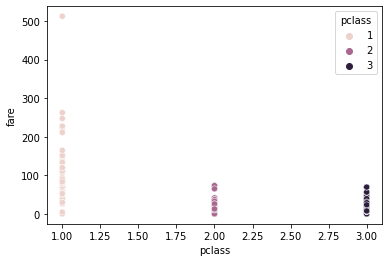

In [539]:
# scatterplot 
sns.scatterplot(data=titanic, x="pclass", y="fare", hue="pclass")

<AxesSubplot:xlabel='age', ylabel='fare'>

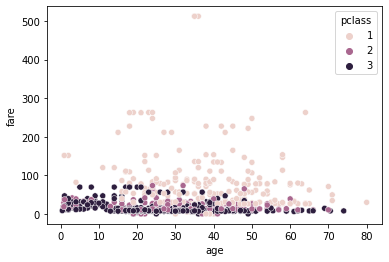

In [540]:
sns.scatterplot(data=titanic, x="age", y="fare", hue="pclass")

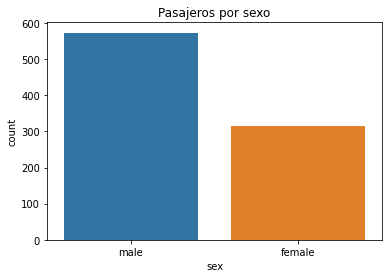

In [541]:
a = sns.countplot(data=titanic, x='sex')
a.set_title("Pasajeros por sexo")
plt.show() # probar sin el plt.show()

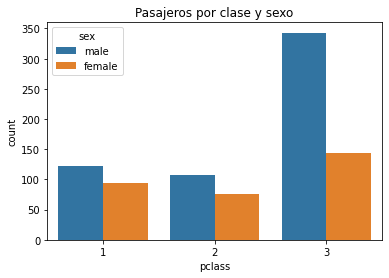

In [542]:
# Conteo por clase y sexo
a = sns.countplot(data=titanic, x="pclass", hue="sex")
a.set_title("Pasajeros por clase y sexo")
plt.show()

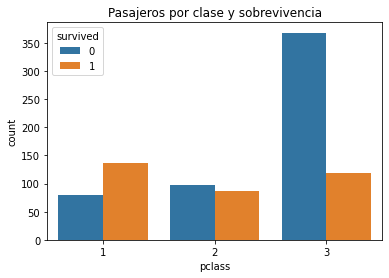

In [543]:
# Conteo por clase y sobrevivencia
a = sns.countplot(data=titanic, x="pclass", hue="survived")
a.set_title("Pasajeros por clase y sobrevivencia")
plt.show()

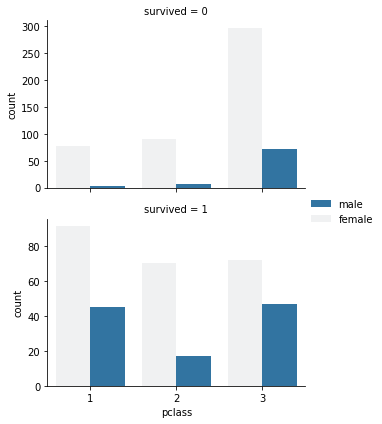

In [544]:
# Facet grid
a = sns.FacetGrid(data=titanic, row="survived", sharey=False, aspect=1.5, legend_out=True)
a.map_dataframe(sns.countplot, x="pclass", hue="sex")
a.add_legend()
plt.show()

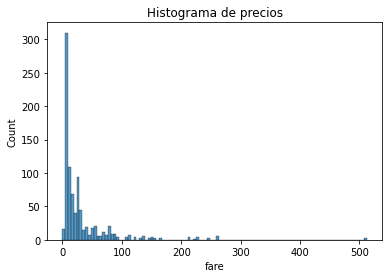

In [545]:
# Histograma de precios 
a = sns.histplot(data=titanic, x="fare")
a.set_title("Histograma de precios")
plt.show()

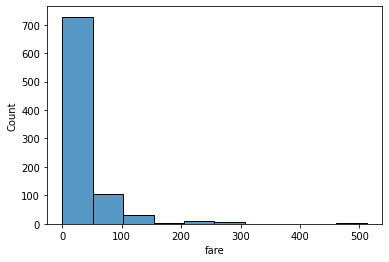

In [546]:
# cambiando el número de los buckets 
a = sns.histplot(data=titanic, x="fare", bins=10)

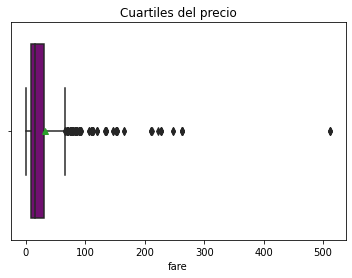

In [547]:
# Boxplot 
a = sns.boxplot(data=titanic, x="fare", showmeans=True, color="purple")
a.set_title("Cuartiles del precio")
plt.show()

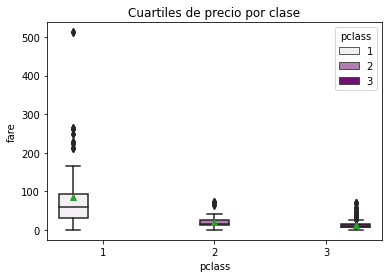

In [548]:
a = sns.boxplot(data=titanic, x="pclass", y="fare", hue="pclass", color="purple", showmeans=True)
a.set_title("Cuartiles de precio por clase")
plt.show()

Puedes quitar los outliers sin afectar la distribución

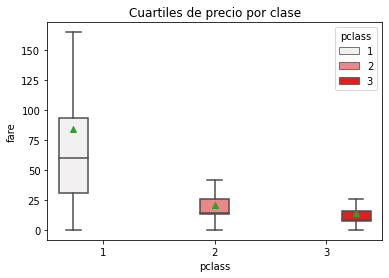

In [549]:
a = sns.boxplot(data=titanic, x="pclass", y="fare", hue="pclass", 
                color="red", showmeans=True, showfliers=False)
a.set_title("Cuartiles de precio por clase")
plt.show()

Podemos cambiar la orientación

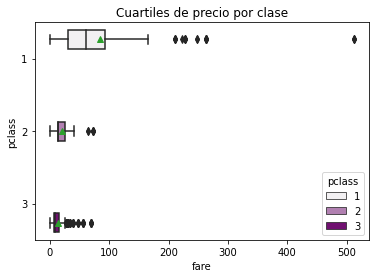

In [550]:
a = sns.boxplot(data=titanic, x="fare", y="pclass", hue="pclass", color="purple", 
                showmeans=True, orient="h")
a.set_title("Cuartiles de precio por clase")
plt.show()

In [551]:
# Heatmap: tenemos que acomodar los datos para que estén exactamente como la matriz que quieres visualizar
titanic_viz = titanic.groupby(['pclass', "sex"], as_index=False)["survived"].count()\
.rename(columns={"survived": "pasajeros"})
titanic_viz

,pclass,sex,pasajeros
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,343


In [552]:
viz = titanic_viz.pivot(index="pclass", columns="sex", values="pasajeros")
viz

sex,female,male
pclass,,
1,94,122
2,76,108
3,144,343


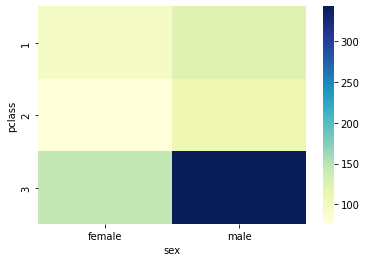

In [553]:
a = sns.heatmap(viz, cmap="YlGnBu")
plt.show()

In [554]:
# otro ejemplo con más datos
flights = sns.load_dataset("flights")

In [555]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [556]:
flights_p = flights.pivot("month", "year", "passengers")

In [557]:
flights_p

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


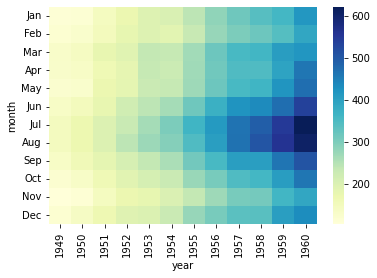

In [558]:
a = sns.heatmap(flights_p, cmap="YlGnBu")
plt.show()

### Plotly

Este *framework* permite que tus gráficas sean "interactivas". 

Utiliza con cuidado este *framework*, solo tiene sentido hacer gráficas interactivas si lo que entregas es un html, en un pdf no hay manera de "interactuar" con las gráficas. 

Cuando veas la parte de Análisis Exploratorio de Datos aprenderás las reglas que las visualizaciones deben seguir, pero en particular una de las más importantes es que una gráfica simple y sin ambigüedad es más importante que una barroca que puede producir múltiples interpretaciones. 

Para ocupar este *framework* necesitas instalar el paquete plotly con la siguiente instrucción: `pip install plotly`.

In [559]:
# plotly express te permite hacer gráficas básicas
import plotly.express as px

In [560]:
# scatterplot
px.scatter(data_frame=titanic, x="age", y="fare", color="pclass", title="Precios del boleto por edad y clase")

In [561]:
# boxplot 
px.box(data_frame=titanic, x="fare", )

In [565]:
# heatmap
import plotly.graph_objects as go

go.Figure(go.Heatmap(x=flights.year, y=flights.month, z=flights.passengers))

El set de datos ocupado en estos ejercicios lo puedes encontrar aquí: [Bejing Pollution Data, Kaggle](https://www.kaggle.com/parikshitdasgupta/raw-data-beijing-pollution)

### Referencias 

+ [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/version/1.0.0/getting_started/10min.html)
+ [Padas API](https://pandas.pydata.org/pandas-docs/version/1.0.0/reference/series.html)
+ [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html)
+ [Seaborn API](https://seaborn.pydata.org/)
+ [How Charts Lie: Getting Smarter about Visual Information](https://www.amazon.com.mx/How-Charts-Lie-Getting-Information/dp/1324001569/ref=sr_1_1?__mk_es_MX=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=DZEM6ETEUR7V&dchild=1&keywords=who+to+lie+with+graph&qid=1635446111&sprefix=who+to+lie+with+graph%2Caps%2C158&sr=8-1)
+ [Storytelling with Data: A Data Visualization Guide for Business Professionals](https://www.amazon.com.mx/Storytelling-Data-Visualization-Business-Professionals/dp/1119002257/ref=pd_bxgy_img_1/147-5156350-0286618?pd_rd_w=ghzHm&pf_rd_p=ec769340-27a9-4ec8-ac7c-c4e81baf2e13&pf_rd_r=6BNQG07NPRZMWN16EQ29&pd_rd_r=6c7a7ce2-8f7a-46ba-a75c-fbef0591a9c2&pd_rd_wg=onPkJ&pd_rd_i=1119002257&psc=1)
+ [Good Charts: The HBR Guide to Making Smarter, More Persuasive Data Visualizations](https://www.amazon.com.mx/Good-Charts-Smarter-Persuasive-Visualizations/dp/1633690709/ref=pd_bxgy_img_2/147-5156350-0286618?pd_rd_w=iTSq1&pf_rd_p=ec769340-27a9-4ec8-ac7c-c4e81baf2e13&pf_rd_r=N9M1BJ0860W9XYYSBZ3E&pd_rd_r=d9edb496-b6b2-4383-b578-666c731bcb31&pd_rd_wg=TaxEJ&pd_rd_i=1633690709&psc=1)
+ [Plotly, gráficas básicas](https://plotly.com/python/basic-charts/)
+ [Plotly API de referencia](https://plotly.com/python-api-reference/)